In [3]:
# Cell 1: Import libraries yang diperlukan

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Cell 2: Load gambar

# Ganti 'foto/foto1.jpg' dengan path gambar Anda
img = cv2.imread('foto/foto.jpg')

if img is None:
    print("Gambar tidak ditemukan. Pastikan path benar.")
else:
    print("Gambar berhasil dimuat dengan ukuran:", img.shape)

Gambar berhasil dimuat dengan ukuran: (650, 650, 3)


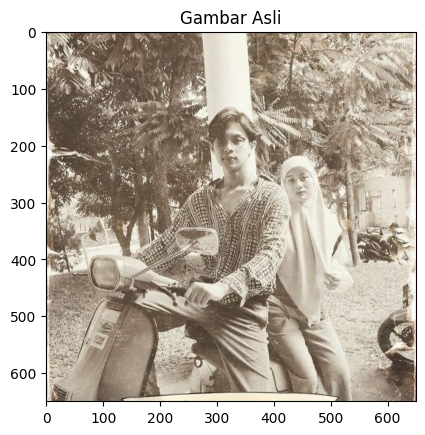

In [24]:
# Cell 3: Tampilkan gambar asli

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.show()

In [7]:
# Cell 4: Buat mask sederhana (lingkaran)

# Mask berukuran sama dengan gambar
mask = np.zeros_like(img)

# Buat lingkaran putih di tengah
center = (img.shape[1] // 2, img.shape[0] // 2)
radius = min(img.shape[0], img.shape[1]) // 4
cv2.circle(mask, center, radius, (255, 255, 255), -1)

# Konversi ke grayscale untuk operasi logika
mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

In [8]:
# Cell 5: Operasi logika AND

# Konversi gambar ke grayscale untuk operasi logika
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Operasi AND: hanya piksel yang ada di mask yang dipertahankan
masked_and = cv2.bitwise_and(img_gray, img_gray, mask=mask_gray)

In [9]:
# Cell 6: Operasi logika OR

# Buat gambar kedua (misalnya, gambar dengan pola)
img2 = np.zeros_like(img_gray)
cv2.rectangle(img2, (50, 50), (200, 200), 255, -1)

# Operasi OR: gabungkan piksel dari kedua gambar
masked_or = cv2.bitwise_or(img_gray, img2)

In [10]:
# Cell 7: Operasi logika XOR

# Operasi XOR: piksel yang berbeda akan dipertahankan
masked_xor = cv2.bitwise_xor(img_gray, img2)

In [11]:
# Cell 8: Operasi logika NOT

# Operasi NOT: invert piksel
masked_not = cv2.bitwise_not(img_gray)

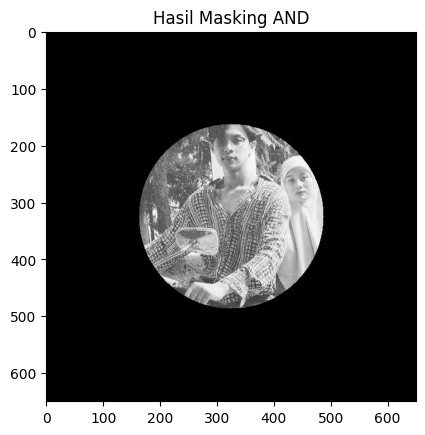

In [12]:
# Cell 9: Tampilkan hasil masking AND

plt.imshow(masked_and, cmap='gray')
plt.title('Hasil Masking AND')
plt.show()

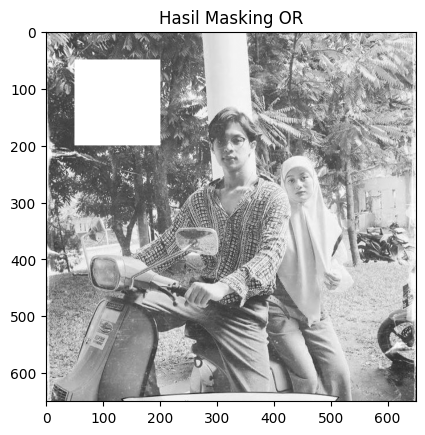

In [13]:
# Cell 10: Tampilkan hasil masking OR

plt.imshow(masked_or, cmap='gray')
plt.title('Hasil Masking OR')
plt.show()

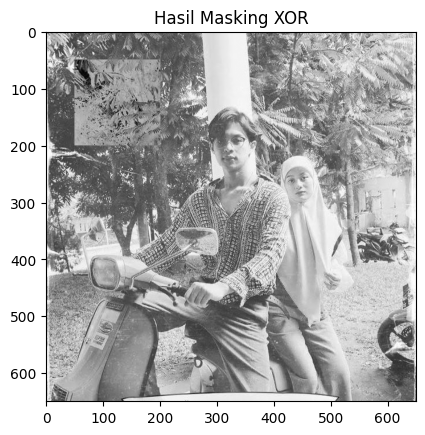

In [14]:
# Cell 11: Tampilkan hasil masking XOR

plt.imshow(masked_xor, cmap='gray')
plt.title('Hasil Masking XOR')
plt.show()

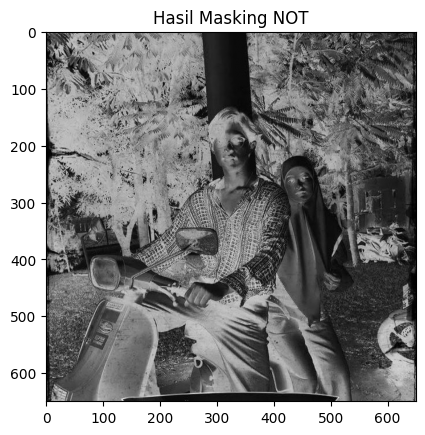

In [15]:
# Cell 12: Tampilkan hasil masking NOT

plt.imshow(masked_not, cmap='gray')
plt.title('Hasil Masking NOT')
plt.show()

In [ ]:
# Cell 13: Simpan gambar hasil masking jika diperlukan

cv2.imwrite('masked_and.jpg', masked_and)
cv2.imwrite('masked_or.jpg', masked_or)
cv2.imwrite('masked_xor.jpg', masked_xor)
cv2.imwrite('masked_not.jpg', masked_not)
print("Gambar hasil masking disimpan.")